#Запитання
https://docs.google.com/spreadsheets/d/1MUcaisEhx1GA23fRlONi4h_7Aews1YtR/edit?usp=sharing&ouid=101959502096486530675&rtpof=true&sd=true

>[Запитання](#scrollTo=oqx4mYnCYQ0H)

>[Метрики в машинному навчанні](#scrollTo=nEmhzK2qEjfJ)

>>[Приклад задачі регресії](#scrollTo=_ypPo_2_GQWp)

>>>[Середня абсолютна помилка](#scrollTo=8S1rDQRmJ0cZ)

>>>[Середньоквадратична помилка](#scrollTo=6w5ZwBVUEahh)

>>>[Коефіцієнт детермінації](#scrollTo=nx5Vtf2iW8Nn)

>>>[Середня абсолютна похибка у відсотках](#scrollTo=MW5rOT6bDUkl)

>>>[Гомоскедастичність vs Гетероскедастичність](#scrollTo=PLRPgwGukQZj)

>>>[Несиметричні втрати](#scrollTo=DuHidbY8Zp4w)

>>>[Середньоквадратична логарифмічна похибка](#scrollTo=XsZRn-g8b76y)

>>[Приклад задачі класифікації](#scrollTo=bbgnNVqTFRpF)

>>>[Частка правильних відповідей](#scrollTo=dgFVXz_upO8O)

>>>[Точність та повнота](#scrollTo=xspYazxHB3NO)

>>>[Приклади використання точності та повноти](#scrollTo=RiZDmUsFzTDl)

>>>[Об'єднання точності та повноти](#scrollTo=Mos4llTsy4yB)

>>>[Арифметичне середнє](#scrollTo=ld3CqTaJy8zb)

>>>[Мінімум](#scrollTo=pqheNnmDzADW)

>>>[F-міра](#scrollTo=gWbuLsNmzCUG)

>>[Якість оцінок приналежності класу](#scrollTo=2H0JvFWVzHFF)

>>>[Оцінка приналежності класу задачі Breast Cancer](#scrollTo=E6tlvXnkzO9r)

>>>[PR-крива](#scrollTo=gZ5rOj_kzRhu)

>>>[ROC-крива](#scrollTo=vm839U7czVvl)

>>>[Особливості AUC-ROC та AUC-PRC](#scrollTo=AAU4JFJzzYx_)

>[Що розглянули?](#scrollTo=lrH898P0Cjlp)

>[Що далі?](#scrollTo=w2LTZCXwCxW7)

>[Домашнє завдання](#scrollTo=zDFA10t-CqWd)

>[Запитання](#scrollTo=lJXpp530C9yJ)



In [ ]:
# !pip install --use-deprecated=legacy-resolver pycaret[full]

In [ ]:
!pip install pycaret[full]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.linear_model import (
    LinearRegression,
)

warnings.filterwarnings("ignore")

In [ ]:
from pycaret.datasets import get_data
import plotly.express as px
from pycaret.regression import *

In [ ]:
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error,
                            mean_absolute_percentage_error, explained_variance_score,
                            mean_pinball_loss, mean_squared_log_error)
import math

In [ ]:
# !pip install mlflow

#Метрики в машинному навчанні

![picture](https://drive.google.com/uc?id=11wB53opzTzBSrVf_KuuYQ7BJURLh14tG)

https://www.kdnuggets.com/2018/06/right-metric-evaluating-machine-learning-models-2.html

https://scikit-learn.org/stable/modules/model_evaluation.html

##Приклад задачі регресії




In [ ]:
data = get_data('boston')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<pre>
CRIM: per capita crime rate by town

ZN: This feature represents the proportion of residential land zoned for lots over 25,000 sq.ft. It indicates the amount of land in each town that is designated for large residential lots.

INDUS: INDUS represents the proportion of non-retail business acres per town. It indicates the amount of land devoted to non-retail businesses, such as manufacturing or industrial activities, in each town.

CHAS: CHAS is a dummy variable that represents whether a town borders the Charles River or not. It takes a value of 1 if the town does border the river, and 0 otherwise.

NOX: NOX represents the concentration of nitric oxides (air pollution) in parts per 10 million. It measures the level of air pollution in each town.

RM: RM stands for average number of rooms per dwelling. It represents the average number of rooms in houses or apartments in each town.

AGE: AGE represents the proportion of owner-occupied units that were built prior to 1940. It indicates the age of the housing stock in each town, with higher values indicating a higher proportion of older homes.

DIS: DIS stands for weighted distances to five Boston employment centers. It represents the average distance from each town to five major employment centers in Boston, with lower values indicating closer proximity.

RAD: RAD is an index of accessibility to radial highways. It measures the accessibility of each town to radial highways, with higher values indicating better accessibility.

TAX: TAX represents the full-value property-tax rate per $10,000. It indicates the property tax rate for each town, with higher values indicating higher tax rates.

PTRATIO: PTRATIO represents the pupil-teacher ratio by town. It reflects the average number of students per teacher in the town's public schools.

B: Bk is the proportion of blacks by town

LSTAT: percent lower status of the population

(TARGET) MEDV: MEDV represents the median value of owner-occupied homes in $1000s. It indicates the median price of homes in each town, which is a commonly used measure of housing market values.


</pre>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.shape

(506, 14)

In [ ]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

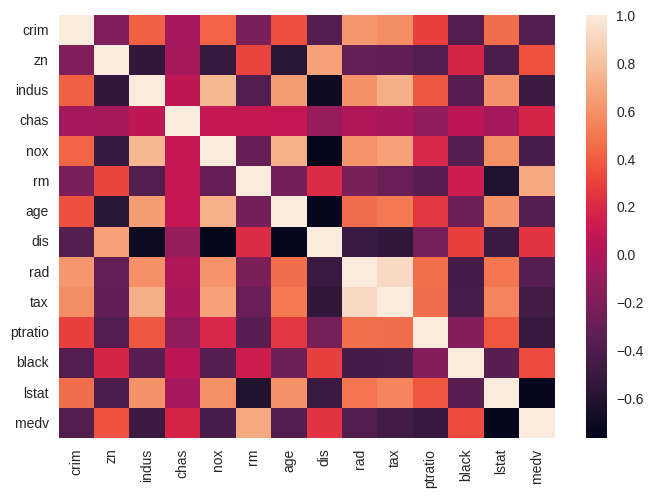

In [ ]:
sns.heatmap(data.corr())

In [ ]:
fig = px.histogram(data, x=["medv"])
fig.show()

Побудова моделі регресії засобами sklearn

In [ ]:
def data_scale(data, scaler_type='minmax'):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import Normalizer
    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    if scaler_type == 'std':
        scaler = StandardScaler()
    if scaler_type == 'norm':
        scaler = Normalizer()

    scaler.fit(data)
    res = scaler.transform(data)
    return res

In [ ]:
data_scaled = data_scale(data, 'std')
df_scaled = pd.DataFrame(data_scaled, columns=[data.columns])


In [ ]:
df_scaled.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.123388e-16,7.898820e-17,2.106352e-16,-3.510587e-17,-1.965929e-16,-1.088282e-16,-1.474446e-16,-8.425408e-17,-1.123388e-16,0.000000,-4.212704e-16,-7.442444e-16,-3.089316e-16,-5.195668e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379e+00,-3.907193e+00,-1.531127e+00,-1.908226e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-0.767576,-4.880391e-01,2.050715e-01,-7.994200e-01,-5.994557e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-0.464673,2.748590e-01,3.811865e-01,-1.812536e-01,-1.450593e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926,8.065758e-01,4.336510e-01,6.030188e-01,2.685231e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194,1.638828e+00,4.410519e-01,3.548771e+00,2.989460e+00


In [ ]:
X = df_scaled.drop('medv',axis=1)
y = df_scaled['medv']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True)

In [ ]:
X_train.shape, X_test.shape

((354, 13), (152, 13))

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
lr.coef_

array([[-0.0329613 ,  0.1294006 ,  0.07512637,  0.05703127, -0.26481157,
         0.24820771,  0.02007429, -0.33827974,  0.27904893, -0.24809336,
        -0.222042  ,  0.10500944, -0.46560215]])

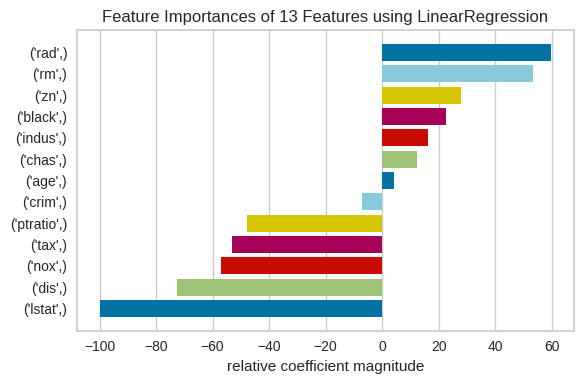

<Axes: title={'center': 'Feature Importances of 13 Features using LinearRegression'}, xlabel='relative coefficient magnitude'>

In [ ]:
from yellowbrick.features import (
    FeatureImportances,
)
fig, ax = plt.subplots(figsize=(6, 4))
fi_viz = FeatureImportances(
    lr, labels=X.columns
)
fi_viz.fit(X_train, y_train)
fi_viz.poof()

Дослідження данних засобами PyCaret

In [ ]:
from pycaret.regression import setup

In [ ]:
s = setup(data, target = 'medv', log_experiment = True,
    experiment_name = 'housing_prices')

,Description,Value
0,Session id,1258
1,Target,medv
2,Target type,Regression
3,Original data shape,"(506, 14)"
4,Transformed data shape,"(506, 14)"
5,Transformed train set shape,"(354, 14)"
6,Transformed test set shape,"(152, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.0324,7.5527,2.7310,0.9097,0.1344,0.1058,0.3370
rf,Random Forest Regressor,2.1246,8.4183,2.8812,0.9000,0.1370,0.1094,0.5830
et,Extra Trees Regressor,2.0592,8.9136,2.9456,0.8968,0.1356,0.1055,0.5270
catboost,CatBoost Regressor,2.0627,9.0206,2.9756,0.8951,0.1338,0.1041,3.8510
xgboost,Extreme Gradient Boosting,2.2170,8.8465,2.9286,0.8946,0.1439,0.1157,0.3140
lightgbm,Light Gradient Boosting Machine,2.3834,12.5062,3.4670,0.8540,0.1542,0.1199,0.2200
dt,Decision Tree Regressor,2.7140,13.8443,3.6640,0.8420,0.1839,0.1407,0.0660
ada,AdaBoost Regressor,2.7552,13.7556,3.6741,0.8381,0.1752,0.1473,0.3750
lr,Linear Regression,3.6416,26.2846,5.0701,0.7023,0.2513,0.1824,1.5620
ridge,Ridge Regression,3.6177,26.4977,5.0911,0.6995,0.2597,0.1820,0.0440


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
best

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='squared_error',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=100, n_iter_no_change=None,
                          random_state=1258, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

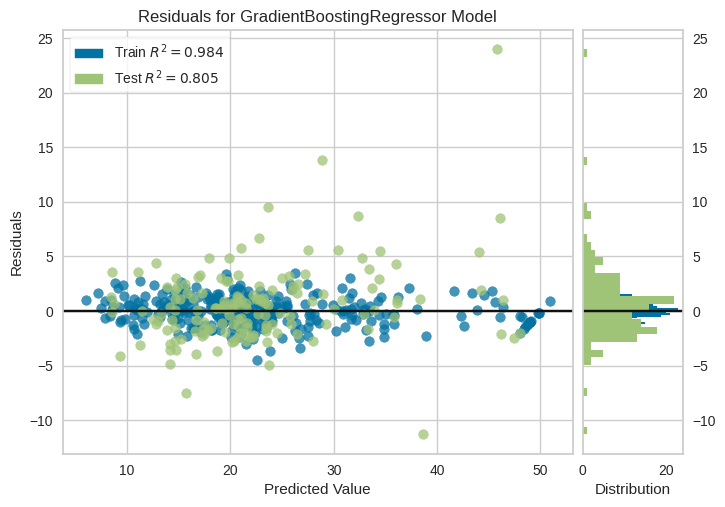

In [ ]:
# plot residuals
plot_model(best, plot = 'residuals')

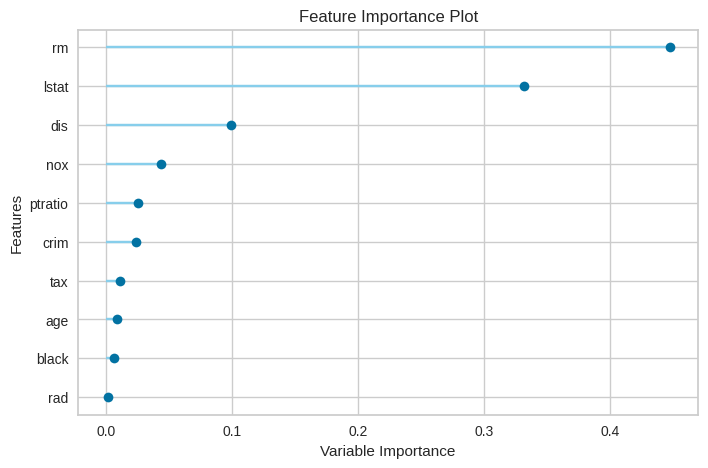

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
y_pred = lr.predict(X_test)
# X_test, y_test

###Середня абсолютна помилка
https://en.wikipedia.org/wiki/Mean_absolute_error



In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.38255794529908704

###Середньоквадратична помилка
https://en.wikipedia.org/wiki/Mean_squared_error

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

0.24121376392721897

###Коефіцієнт детермінації
https://uk.wikipedia.org/wiki/%D0%9A%D0%BE%D0%B5%D1%84%D1%96%D1%86%D1%96%D1%94%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D1%96%D0%BD%D0%B0%D1%86%D1%96%D1%97

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.7717424206998151

###Середня абсолютна похибка у відсотках
Mean absolute percentage error (https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)



In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

2.138990823288354

In [ ]:
def rmse(y_actual, y_predicted):
    MSE = mean_squared_error(y_actual, y_predicted)
    RMSE = math.sqrt(MSE)
    return RMSE

In [ ]:
rmse(y_test, y_pred)


0.4911351788736162

https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a

###Гомоскедастичність vs Гетероскедастичність
https://www.geeksforgeeks.org/heteroscedasticity-in-regression-analysis/

https://corporatefinanceinstitute.com/resources/data-science/heteroskedasticity/

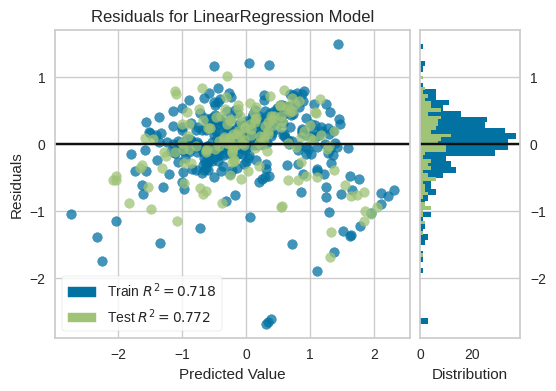

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
fig, ax = plt.subplots(figsize=(6, 4))
rpv = ResidualsPlot(lr)
rpv.fit(X_train, y_train)
rpv.score(X_test, y_test)
rpv.poof()

###Несиметричні втрати

###Середньоквадратична логарифмічна похибка
Root Mean Squared Logarithmic Error (RMSLE)
Середньоквадратична логарифмічна похибка обчислюється шляхом застосування логарифму до фактичних і прогнозованих значень, а потім врахування їх різниць. RMSLE стійкий до викидів, де малі та великі помилки обробляються рівномірно.

In [ ]:
def rmsle(y_actual, y_predicted):

    MSLE = mean_squared_log_error(y_actual, y_predicted)

    RMSLE = math.sqrt(MSLE)
    return RMSLE

Див. конспект

In [ ]:
from sklearn.metrics import mean_squared_log_error
y_true = [3, 5, 2.5, 7]
y_pred = [2.5, 5, 4, 8]
print('mse', mean_squared_error(y_true, y_pred))
print('msle',mean_squared_log_error(y_true, y_pred))
y_true = [[0.5, 1], [1, 2], [7, 6]]
y_pred = [[0.1, 0.7], [1, 2.5], [8, 8]]
print('mse', mean_squared_error(y_true, y_pred))
print('msle', mean_squared_log_error(y_true, y_pred))

mse 0.875
msle 0.03973012298459379
mse 0.9166666666666666
msle 0.037233783239676715


##Приклад задачі класифікації


In [ ]:
from sklearn import datasets
dataset = datasets.load_breast_cancer()
print(dataset.keys())
print(dataset.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

In [ ]:
df = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data_scaled = data_scale(df, 'std')
df_scaled = pd.DataFrame(data_scaled, columns=[df.columns])


In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [ ]:
df_target = pd.DataFrame(dataset['target'], columns =['cancer'])
df_bc = pd.concat([df_scaled, df_target], axis=1)

In [ ]:
# X, y = dataset.data, dataset.target
X_bc, y_bc = df_scaled, dataset.target
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
    X_bc, y_bc, test_size=0.2, shuffle=True
)


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.metrics import confusion_matrix

[1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1
 1 0 1]
[[9.12029537e-06 9.99990880e-01]
 [1.36796883e-02 9.86320312e-01]
 [1.70944408e-03 9.98290556e-01]
 [4.49272503e-05 9.99955073e-01]
 [9.99967945e-01 3.20548445e-05]
 [9.97297654e-01 2.70234631e-03]
 [7.40266599e-01 2.59733401e-01]
 [9.99999655e-01 3.45460538e-07]
 [9.99991978e-01 8.02219593e-06]
 [2.72923033e-04 9.99727077e-01]
 [1.00000000e+00 1.63126364e-13]
 [5.56689384e-05 9.99944331e-01]
 [9.95039425e-01 4.96057487e-03]
 [9.95165949e-01 4.83405139e-03]
 [7.95861213e-05 9.99920414e-01]
 [8.58325057e-06 9.99991417e-01]
 [9.99999922e-01 7.81108491e-08]
 [3.23254203e-01 6.76745797e-01]
 [9.99374958e-01 6.25041733e-04]
 [7.57930163e-06 9.99992421e-01]
 [1.04541612e-01 8.95458388e-01]
 [1.59201512e-04 9.99840798e-01]
 [9.99999964e-01 3.64991534e-08]
 [4.7146

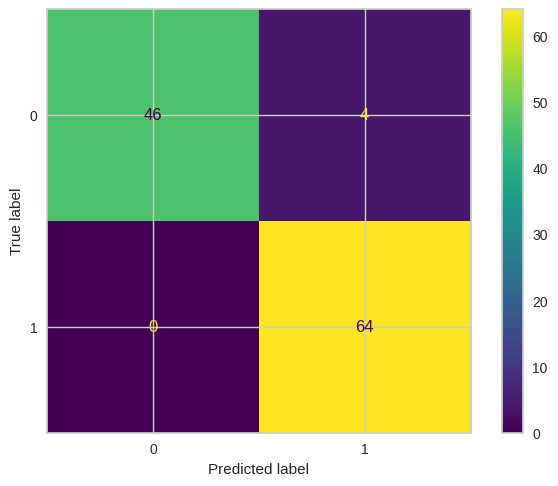

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf = LogisticRegression(random_state=0).fit(X_train_bc, y_train_bc)

y_pred_bc = clf.predict(X_test_bc)
print(y_pred_bc)
print(clf.predict_proba(X_test_bc))
y_test_bc, y_pred_bc = np.asarray(y_test_bc), np.asarray(y_pred_bc)

# label_encoder=mapping

cm = confusion_matrix(np.asarray(y_test_bc), np.asarray(y_pred_bc))
cm

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
from pycaret.classification import *
clf1 = setup(df_bc, target = 'cancer', session_id=786)

,Description,Value
0,Session id,786
1,Target,cancer
2,Target type,Binary
3,Original data shape,"(569, 31)"
4,Transformed data shape,"(569, 31)"
5,Transformed train set shape,"(398, 31)"
6,Transformed test set shape,"(171, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:13:40
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9724,0.9952,0.9840,0.9747,0.9785,0.9398,0.9431,1.3820
svm,SVM - Linear Kernel,0.9699,0.0000,0.9760,0.9769,0.9761,0.9353,0.9366,0.0330
ada,Ada Boost Classifier,0.9699,0.9832,0.9880,0.9668,0.9765,0.9347,0.9379,0.3470
knn,K Neighbors Classifier,0.9698,0.9903,0.9920,0.9627,0.9766,0.9340,0.9368,0.0390
ridge,Ridge Classifier,0.9599,0.0000,0.9960,0.9458,0.9695,0.9112,0.9167,0.0350
et,Extra Trees Classifier,0.9599,0.9947,0.9680,0.9698,0.9674,0.9149,0.9191,0.2740
qda,Quadratic Discriminant Analysis,0.9598,0.9858,0.9680,0.9691,0.9676,0.9144,0.9174,0.0370
lightgbm,Light Gradient Boosting Machine,0.9574,0.9923,0.9800,0.9561,0.9667,0.9074,0.9123,0.8870
gbc,Gradient Boosting Classifier,0.9549,0.9921,0.9720,0.9583,0.9639,0.9034,0.9070,0.6540
lda,Linear Discriminant Analysis,0.9548,0.9958,0.9920,0.9422,0.9655,0.9002,0.9065,0.0690


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9724,0.9952,0.9840,0.9747,0.9785,0.9398,0.9431,1.3820
svm,SVM - Linear Kernel,0.9699,0.0000,0.9760,0.9769,0.9761,0.9353,0.9366,0.0330
ada,Ada Boost Classifier,0.9699,0.9832,0.9880,0.9668,0.9765,0.9347,0.9379,0.3470
knn,K Neighbors Classifier,0.9698,0.9903,0.9920,0.9627,0.9766,0.9340,0.9368,0.0390
catboost,CatBoost Classifier,0.9674,0.9934,0.9800,0.9699,0.9742,0.9297,0.9324,12.2510
ridge,Ridge Classifier,0.9599,0.0000,0.9960,0.9458,0.9695,0.9112,0.9167,0.0350
et,Extra Trees Classifier,0.9599,0.9947,0.9680,0.9698,0.9674,0.9149,0.9191,0.2740
qda,Quadratic Discriminant Analysis,0.9598,0.9858,0.9680,0.9691,0.9676,0.9144,0.9174,0.0370
lightgbm,Light Gradient Boosting Machine,0.9574,0.9923,0.9800,0.9561,0.9667,0.9074,0.9123,0.8870
gbc,Gradient Boosting Classifier,0.9549,0.9921,0.9720,0.9583,0.9639,0.9034,0.9070,0.6540


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=786, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

###Частка правильних відповідей

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_bc, y_pred_bc)

0.9649122807017544

###Точність та повнота

Точність (Precision) – це частка правильних позитивних класифікацій (істинно позитивних), поділена на загальну кількість прогнозованих позитивних класифікацій, які були зроблені (істинно позитивні + хибнопозитивні).

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test_bc, y_pred_bc)

0.9411764705882353

Повнота (Recall) — це частка правильних позитивних класифікацій (істинно позитивних), поділена на загальну кількість справді позитивних класифікацій (істинно позитивних + хибно негативних).

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test_bc, y_pred_bc)

1.0

###Приклади використання точності та повноти
Див. конспект

###Об'єднання точності та повноти
Див. конспект

###Арифметичне середнє
Див. конспект

###Мінімум
Див. конспект

###F-міра

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test_bc, y_pred_bc)

0.9696969696969697

##Якість оцінок приналежності класу
https://www.datacamp.com/tutorial/precision-recall-curve-tutorial?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720824&utm_adgroupid=143216588537&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=671350460579&utm_targetid=dsa-1947282172981&utm_loc_interest_ms=&utm_loc_physical_ms=1012849&utm_content=dsa~page~community-tuto&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-row-p2_4-prc_5-na_6-na_7-le_8-pdsh-go_9-na_10-na_11-na&gclid=Cj0KCQjw1aOpBhCOARIsACXYv-e3iJ-oNvxh3_9SuYyvOvx63bRaulCcyDzPWnHVSremRMDKufv9z8EaAgzTEALw_wcB

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/


###Оцінка приналежності класу задачі Breast Cancer

###PR-крива
https://www.geeksforgeeks.org/precision-recall-curve-ml/

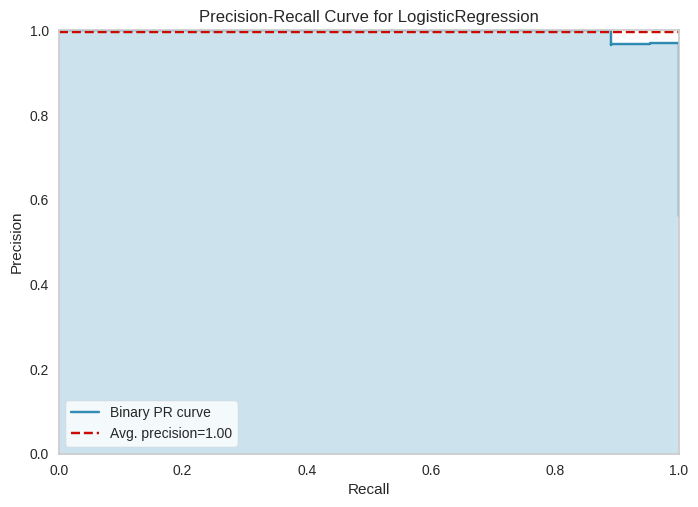

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(LogisticRegression(random_state=0))
viz.fit(X_train_bc, y_train_bc)
viz.score(X_test_bc, y_test_bc)
viz.show()

###ROC-крива

https://www.geeksforgeeks.org/calculate-efficiency-binary-classifier/

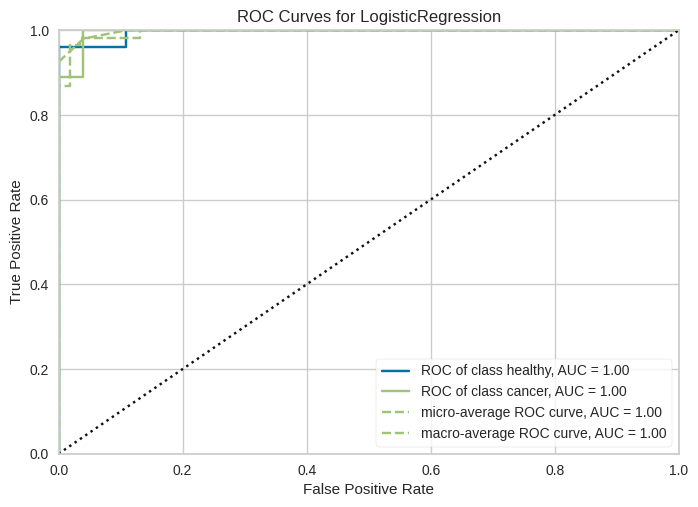

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from yellowbrick.classifier import ROCAUC
model = LogisticRegression(random_state=0)
visualizer = ROCAUC(model, classes=["healthy", "cancer"])

visualizer.fit(X_train_bc, y_train_bc)        # Fit the training data to the visualizer
visualizer.score(X_test_bc, y_test_bc)        # Evaluate the model on the test data
visualizer.show()

###Особливості AUC-ROC та AUC-PRC

Див. конспект

#Що розглянули?

- Метрики регресії
- Метрики класифікації
- Практичний приклад на наборах Boston Housing, Breast Cancer
- Використання бібліотек sklearn, yellowbrick, PyCaret



#Що далі?
- Метод опорних векторів
- Поняття ядрового трюку

#Домашнє завдання

#Запитання